In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.python.client import device_lib


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
#check type x and y train and test sets
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#chech shape -> for x_train 50000 rows, images are 32x32 with 3 color channels
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


Image label is:  [9]
The image class is:  truck


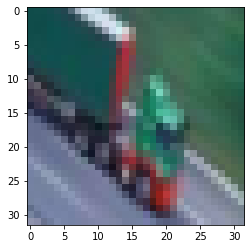

In [6]:
#display an image from the train set with its label
index = 50
x_train[index]
img = plt.imshow(x_train[index])
print("Image label is: ", y_train[index])
classification = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("The image class is: ", classification[y_train[index][0]])

In [7]:
#one hot encode
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [8]:
#normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [9]:
from tensorflow.keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)
hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
         steps_per_epoch=len(x_train) // 128, epochs=200, validation_data=(x_test,y_test))

Epoch 1/200
390/390 [==============================] - 34s 56ms/step - loss: 1.9251 - accuracy: 0.2901 - val_loss: 1.5560 - val_accuracy: 0.4268
Epoch 2/200
390/390 [==============================] - 22s 56ms/step - loss: 1.5103 - accuracy: 0.4481 - val_loss: 1.3220 - val_accuracy: 0.5225
Epoch 3/200
390/390 [==============================] - 22s 57ms/step - loss: 1.3677 - accuracy: 0.5041 - val_loss: 1.2027 - val_accuracy: 0.5614
Epoch 4/200
390/390 [==============================] - 21s 54ms/step - loss: 1.2636 - accuracy: 0.5474 - val_loss: 1.1205 - val_accuracy: 0.6024


In [ ]:
#evaluate the model
model.evaluate(x_test, y_test)

In [ ]:
#plot accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

In [ ]:
pip install shap

In [ ]:
#test model on a image, explain single image
import shap
image = x_test[np.random.randint(0,10000)]
plt.imshow(image)
image = np.expand_dims(image, axis=0)
predictions = model.predict(image)
print(predictions)
predicted_class = np.argmax(predictions)
print("max arg is :", predicted_class)
print("Model prediction",classification[predicted_class])

background = x_test[:500]
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(image)
shap.image_plot(shap_values,image)

In [ ]:
import shap
background = x_test[:1000]
explainer = shap.DeepExplainer(model, background)

n_test_images = 5
start_index = np.random.randint(0,10000)
end_index = start_index + n_test_images
test_images =  x_test[start_index:end_index]
shap_values = explainer.shap_values(test_images)

In [ ]:
shap.image_plot(shap_values,test_images)
# classes from left to right are: "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"